## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
housing = pd.read_csv('kc_house_data.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
for col in housing.columns:
    housing.loc[housing.sample(frac=0.09).index, col] = pd.np.nan

<ipython-input-4-53b0ad4363d5>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  housing.loc[housing.sample(frac=0.09).index, col] = pd.np.nan


In [5]:
val = 0
for col in housing.columns:
    val += housing[col].count()

print(val / housing.size)

0.9099874982636478


In [6]:
housing.notnull().sum(axis = 0)

id               19653
date             19653
price            19653
bedrooms         19653
bathrooms        19653
sqft_living      19653
sqft_lot         19653
floors           19653
waterfront       19653
view             19653
condition        19653
grade            19653
sqft_above       19653
sqft_basement    19653
yr_built         19653
yr_renovated     19653
zipcode          19653
lat              19653
long             19653
sqft_living15    19653
sqft_lot15       19653
dtype: int64

In [7]:
housing.shape

(21597, 21)

In [8]:
housing.isnull().sum(axis =1)

0        3
1        5
2        4
3        0
4        1
        ..
21592    3
21593    2
21594    1
21595    2
21596    1
Length: 21597, dtype: int64

In [9]:
housing.iloc[:,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,NaN,5650.0,1.0,0.0,0.0,...,NaN,1180.0,NaN,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,NaN,NaN,3.0,2.25,2570.0,7242.0,2.0,NaN,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,NaN,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,NaN,NaN,...,6.0,770.0,0.0,1933.0,0.0,98028.0,NaN,-122.233,2720.0,8062.0
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,NaN,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.630000e+08,5/21/2014,360000.0,3.0,NaN,1530.0,1131.0,3.0,0.0,0.0,...,8.0,1530.0,0.0,2009.0,NaN,98103.0,47.6993,-122.346,NaN,1509.0
21593,NaN,2/23/2015,400000.0,4.0,NaN,2310.0,5813.0,2.0,0.0,0.0,...,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21594,1.523300e+09,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,NaN,...,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21595,2.913101e+08,1/16/2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,...,8.0,1600.0,0.0,NaN,0.0,NaN,47.5345,-122.069,1410.0,1287.0


   # Feature Engineering And EAD

In [10]:
housing = housing.drop('id',axis=1)

In [11]:
housing

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3.0,1.00,NaN,5650.0,1.0,0.0,0.0,3.0,NaN,1180.0,NaN,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,NaN,NaN,3.0,2.25,2570.0,7242.0,2.0,NaN,0.0,NaN,7.0,2170.0,400.0,1951.0,1991.0,NaN,47.7210,-122.319,1690.0,7639.0
2,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,NaN,NaN,NaN,6.0,770.0,0.0,1933.0,0.0,98028.0,NaN,-122.233,2720.0,8062.0
3,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,NaN,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3.0,NaN,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,98103.0,47.6993,-122.346,NaN,1509.0
21593,2/23/2015,400000.0,4.0,NaN,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21594,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,NaN,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21595,1/16/2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,NaN,0.0,NaN,47.5345,-122.069,1410.0,1287.0


In [12]:
housing['date'] = pd.to_datetime(housing['date'])
housing['month'] = housing['date'].apply(lambda date:date.month)
housing['year'] = housing['date'].apply(lambda date:date.year)

In [13]:
housing = housing.drop('date', axis =1)

<AxesSubplot:xlabel='month'>

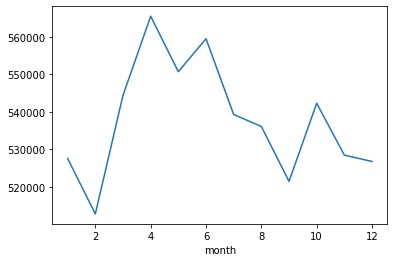

In [14]:
housing.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

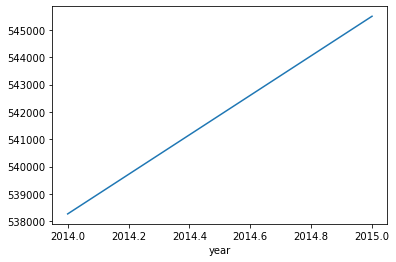

In [15]:
housing.groupby('year').mean()['price'].plot()

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

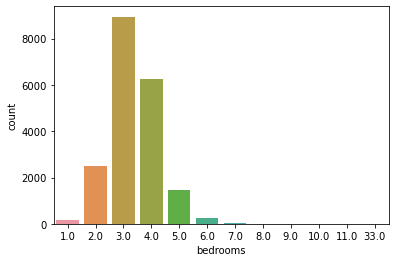

In [16]:
sns.countplot(x='bedrooms',data=housing)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

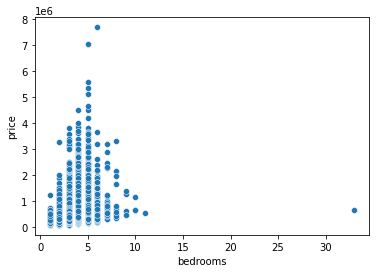

In [17]:
sns.scatterplot(x='bedrooms',y='price',data = housing)

C:\Users\vochi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

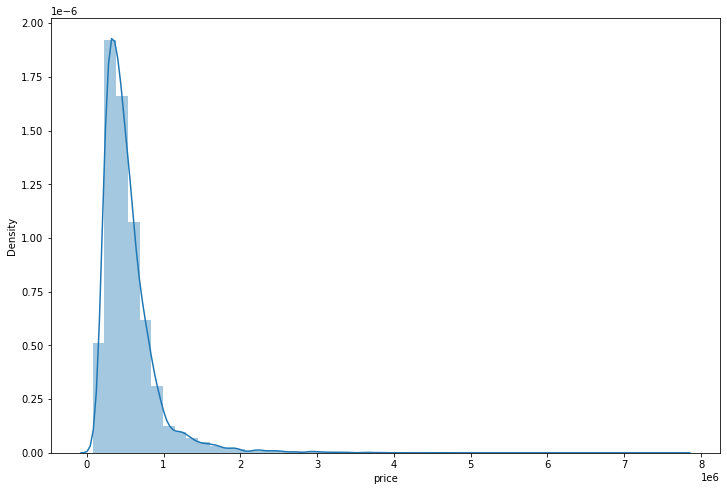

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(housing['price'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

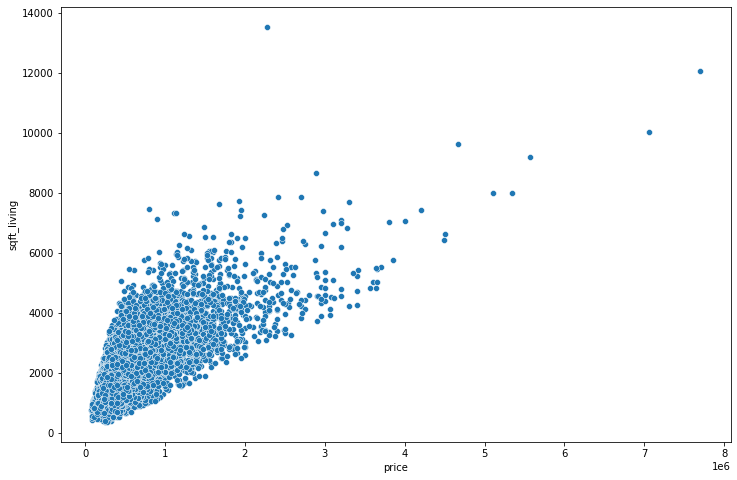

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=housing)

In [20]:
housing = housing.drop('zipcode', axis= 1)

In [21]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3.0,1.00,NaN,5650.0,1.0,0.0,0.0,3.0,NaN,1180.0,NaN,1955.0,0.0,47.5112,-122.257,1340.0,5650.0,10.0,2014.0
1,NaN,3.0,2.25,2570.0,7242.0,2.0,NaN,0.0,NaN,7.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0,NaN,NaN
2,180000.0,2.0,1.00,770.0,10000.0,1.0,NaN,NaN,NaN,6.0,770.0,0.0,1933.0,0.0,NaN,-122.233,2720.0,8062.0,2.0,2015.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0,12.0,2014.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0,2.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,NaN,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,47.6993,-122.346,NaN,1509.0,5.0,2014.0
21593,400000.0,4.0,NaN,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,47.5107,-122.362,1830.0,7200.0,2.0,2015.0
21594,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,NaN,3.0,7.0,1020.0,0.0,2009.0,0.0,47.5944,-122.299,1020.0,2007.0,6.0,2014.0
21595,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,NaN,0.0,47.5345,-122.069,1410.0,1287.0,1.0,2015.0


In [22]:
housing["price"].fillna(housing['price'].mean(), inplace = True)

In [23]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.000000,3.0,1.00,NaN,5650.0,1.0,0.0,0.0,3.0,NaN,1180.0,NaN,1955.0,0.0,47.5112,-122.257,1340.0,5650.0,10.0,2014.0
1,541463.076833,3.0,2.25,2570.0,7242.0,2.0,NaN,0.0,NaN,7.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0,NaN,NaN
2,180000.000000,2.0,1.00,770.0,10000.0,1.0,NaN,NaN,NaN,6.0,770.0,0.0,1933.0,0.0,NaN,-122.233,2720.0,8062.0,2.0,2015.0
3,604000.000000,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0,12.0,2014.0
4,510000.000000,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0,2.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000000,3.0,NaN,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,47.6993,-122.346,NaN,1509.0,5.0,2014.0
21593,400000.000000,4.0,NaN,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,47.5107,-122.362,1830.0,7200.0,2.0,2015.0
21594,402101.000000,2.0,0.75,1020.0,1350.0,2.0,0.0,NaN,3.0,7.0,1020.0,0.0,2009.0,0.0,47.5944,-122.299,1020.0,2007.0,6.0,2014.0
21595,400000.000000,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,NaN,0.0,47.5345,-122.069,1410.0,1287.0,1.0,2015.0


In [24]:
housing.isnull().sum()

price               0
bedrooms         1944
bathrooms        1944
sqft_living      1944
sqft_lot         1944
floors           1944
waterfront       1944
view             1944
condition        1944
grade            1944
sqft_above       1944
sqft_basement    1944
yr_built         1944
yr_renovated     1944
lat              1944
long             1944
sqft_living15    1944
sqft_lot15       1944
month            1944
year             1944
dtype: int64

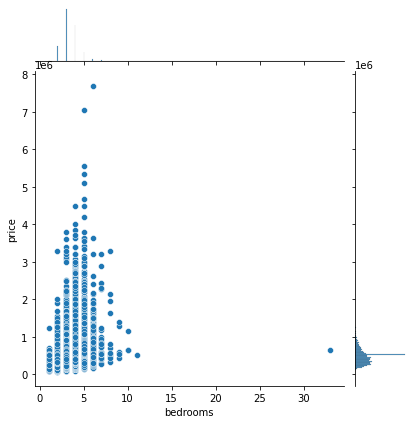

In [25]:
sns.jointplot(x= 'bedrooms',y='price', data = housing)

In [26]:
housing['bedrooms'].fillna(value = 3.0, inplace = True)

In [27]:
housing.isnull().sum()

price               0
bedrooms            0
bathrooms        1944
sqft_living      1944
sqft_lot         1944
floors           1944
waterfront       1944
view             1944
condition        1944
grade            1944
sqft_above       1944
sqft_basement    1944
yr_built         1944
yr_renovated     1944
lat              1944
long             1944
sqft_living15    1944
sqft_lot15       1944
month            1944
year             1944
dtype: int64

In [28]:
housing['floors'].describe()

count    19653.000000
mean         1.494276
std          0.539650
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [29]:
housing['bathrooms'].fillna(value = 2, inplace = True)

In [30]:
housing = housing.drop('month', axis =1)

In [31]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,221900.000000,3.0,1.00,NaN,5650.0,1.0,0.0,0.0,3.0,NaN,1180.0,NaN,1955.0,0.0,47.5112,-122.257,1340.0,5650.0,2014.0
1,541463.076833,3.0,2.25,2570.0,7242.0,2.0,NaN,0.0,NaN,7.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0,NaN
2,180000.000000,2.0,1.00,770.0,10000.0,1.0,NaN,NaN,NaN,6.0,770.0,0.0,1933.0,0.0,NaN,-122.233,2720.0,8062.0,2015.0
3,604000.000000,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0,2014.0
4,510000.000000,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000000,3.0,2.00,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,47.6993,-122.346,NaN,1509.0,2014.0
21593,400000.000000,4.0,2.00,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,47.5107,-122.362,1830.0,7200.0,2015.0
21594,402101.000000,2.0,0.75,1020.0,1350.0,2.0,0.0,NaN,3.0,7.0,1020.0,0.0,2009.0,0.0,47.5944,-122.299,1020.0,2007.0,2014.0
21595,400000.000000,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,NaN,0.0,47.5345,-122.069,1410.0,1287.0,2015.0


In [32]:
housing.fillna({'sqft_living' : housing['sqft_living'].mean(), 'sqft_lot': housing['sqft_lot'].mean(), 'sqft_above':housing['sqft_above'].mean(), 'sqft_basement': housing['sqft_basement'].mean(),'sqft_living15':housing['sqft_living15'].mean(),'sqft_lot15':housing['sqft_lot15'].mean()},inplace = True)

In [33]:
housing['floors'].fillna(value = 1.0, inplace = True)

In [34]:
housing.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1944
view             1944
condition        1944
grade            1944
sqft_above          0
sqft_basement       0
yr_built         1944
yr_renovated     1944
lat              1944
long             1944
sqft_living15       0
sqft_lot15          0
year             1944
dtype: int64

In [35]:
housing.fillna({'waterfront' : 0.0, 'view': 0.0}, inplace = True)

In [36]:
housing.groupby('view').size()

view
0.0    19660
1.0      305
2.0      885
3.0      466
4.0      281
dtype: int64

In [37]:
housing['condition'].fillna(value = 3.0, inplace = True)

In [38]:
#housing = housing.dropna(['lat','long'], axis = 1)
housing.dropna(subset = ['lat','long'], axis =0, inplace= True)


In [39]:
housing.sort_values('price',ascending=False).head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
7245,7700000.0,6.0,8.00,12050.000000,27600.000000,2.5,0.0,0.0,4.0,13.0,8570.000000,3480.000000,1910.0,1987.0,47.6298,-122.323,3940.00000,8800.000000,2014.0
3910,7060000.0,5.0,4.50,10040.000000,37325.000000,2.0,1.0,2.0,3.0,11.0,7680.000000,2360.000000,1940.0,2001.0,47.6500,-122.214,3930.00000,25449.000000,2014.0
4407,5570000.0,5.0,5.75,9200.000000,14961.930647,2.0,0.0,0.0,3.0,13.0,6200.000000,3000.000000,2001.0,0.0,47.6289,-122.233,3560.00000,24345.000000,2014.0
1162,5110000.0,5.0,5.25,8010.000000,45517.000000,1.0,1.0,4.0,3.0,12.0,5990.000000,2020.000000,1999.0,0.0,47.6767,-122.211,3430.00000,26788.000000,2014.0
8085,4670000.0,5.0,6.75,9640.000000,13068.000000,1.0,1.0,4.0,3.0,12.0,4820.000000,4820.000000,1983.0,2009.0,47.5570,-122.210,3270.00000,10454.000000,2014.0
8629,4490000.0,4.0,2.00,6430.000000,27517.000000,2.0,0.0,0.0,3.0,12.0,6430.000000,0.000000,2001.0,0.0,47.6208,-122.219,3720.00000,14592.000000,2014.0
12358,4210000.0,5.0,6.00,7440.000000,21540.000000,2.0,0.0,0.0,3.0,12.0,1786.299344,1890.000000,2003.0,0.0,47.5692,-122.189,4740.00000,19329.000000,2015.0
4145,4000000.0,4.0,5.50,7080.000000,16573.000000,1.0,0.0,0.0,3.0,12.0,5760.000000,1320.000000,NaN,0.0,47.6151,-122.224,3140.00000,15996.000000,2014.0
2083,3850000.0,4.0,4.25,5770.000000,21300.000000,2.0,1.0,0.0,4.0,11.0,5770.000000,0.000000,1980.0,NaN,47.5850,-122.222,4620.00000,22748.000000,2014.0
7028,3800000.0,5.0,5.50,7050.000000,42840.000000,1.0,0.0,2.0,4.0,13.0,1786.299344,2730.000000,1978.0,0.0,47.6229,-122.220,5070.00000,20570.000000,2014.0


In [40]:
len(housing)*(0.01)

178.66

In [41]:
non_top_1_perc = housing.sort_values('price',ascending=False).iloc[216:]

Text(0.5, 1.0, 'Price per Lat and Long')

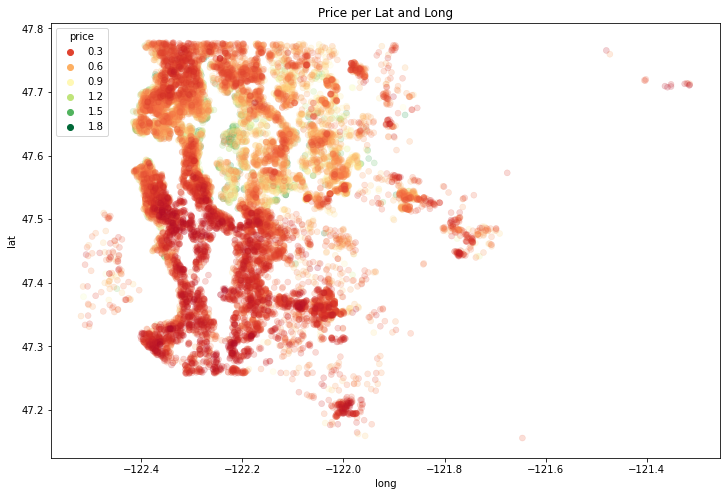

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)
plt.title("Price per Lat and Long")

In [43]:
housing.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade            1639
sqft_above          0
sqft_basement       0
yr_built         1608
yr_renovated     1612
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year             1606
dtype: int64

In [44]:
housing['grade'].fillna(value = 7, inplace = True)

In [45]:
housing.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built         1608
yr_renovated     1612
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year             1606
dtype: int64

<AxesSubplot:>

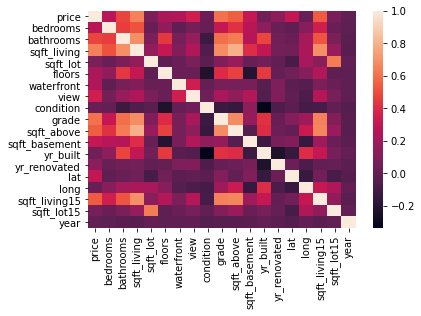

In [46]:
corr = housing.corr()
sns.heatmap(corr)

In [47]:
 housing = housing.dropna(subset = ['yr_built', 'yr_renovated', 'year'])

In [48]:
housing.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
dtype: int64

In [49]:
housing.shape

(13430, 19)

In [50]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3.0,1.00,2080.838345,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,291.328092,1955.0,0.0,47.5112,-122.257,1340.0,5650.000000,2014.0
3,604000.0,4.0,3.00,1960.000000,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.000000,1965.0,0.0,47.5208,-122.393,1360.0,5000.000000,2014.0
4,510000.0,3.0,2.00,1680.000000,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.000000,1987.0,0.0,47.6168,-122.045,1800.0,7503.000000,2015.0
6,257500.0,3.0,2.00,1715.000000,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.000000,1995.0,0.0,47.3097,-122.327,2238.0,12770.283621,2014.0
7,291850.0,3.0,1.50,1060.000000,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.000000,1963.0,0.0,47.4095,-122.315,1650.0,12770.283621,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,1010000.0,4.0,3.50,3510.000000,7200.0,2.0,0.0,0.0,3.0,9.0,2600.0,910.000000,2009.0,0.0,47.5537,-122.398,2050.0,6200.000000,2015.0
21591,475000.0,3.0,2.50,1310.000000,1294.0,2.0,0.0,0.0,3.0,8.0,1180.0,130.000000,2008.0,0.0,47.5773,-122.409,1330.0,1265.000000,2015.0
21593,400000.0,4.0,2.00,2310.000000,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.000000,2014.0,0.0,47.5107,-122.362,1830.0,7200.000000,2015.0
21594,402101.0,2.0,0.75,1020.000000,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.000000,2009.0,0.0,47.5944,-122.299,1020.0,2007.000000,2014.0


## Scaling and Train Test Split

In [51]:
X = housing.drop('price',axis=1)
y = housing['price']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
X_train.shape

(10072, 18)

In [55]:
X_test.shape

(3358, 18)

## Creating Models

#### Linear Regression


In [56]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.6305084520253331
0.6032193469157883


Text(0.5, 0, 'RM')

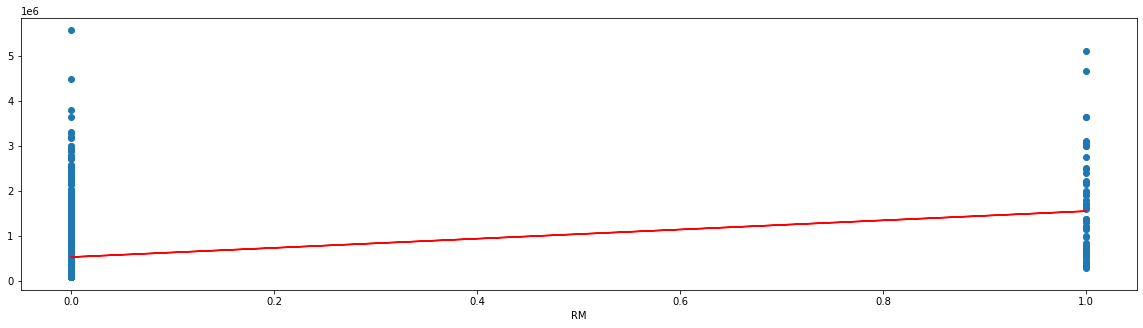

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

#### Polinomial Regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lreg = LinearRegression()
lreg.fit(X,y)

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

#### Ridge

In [59]:
from sklearn.linear_model import Ridge
train_score_list=[]
test_score_list=[]
for alpha in [0.01, 0.1, 1, 10]:
    ridge=Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test,y_test))

In [60]:
print('Train score is: ', train_score_list)
print('Test score is: ', test_score_list)

Train score is:  [0.630508442638972, 0.630507545858592, 0.6304410791456605, 0.6284312514154458]
Test score is:  [0.6032135574357156, 0.6031611397046996, 0.602614769279648, 0.59673826402872]


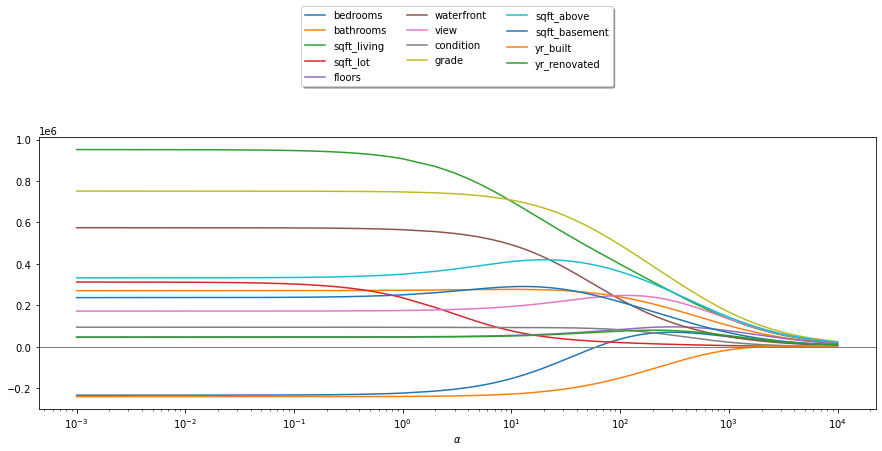

In [61]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

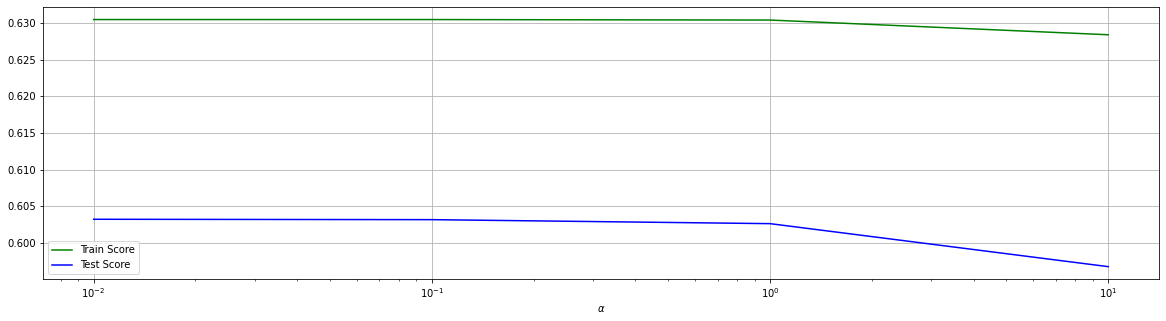

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

#### Lasso

In [63]:

from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

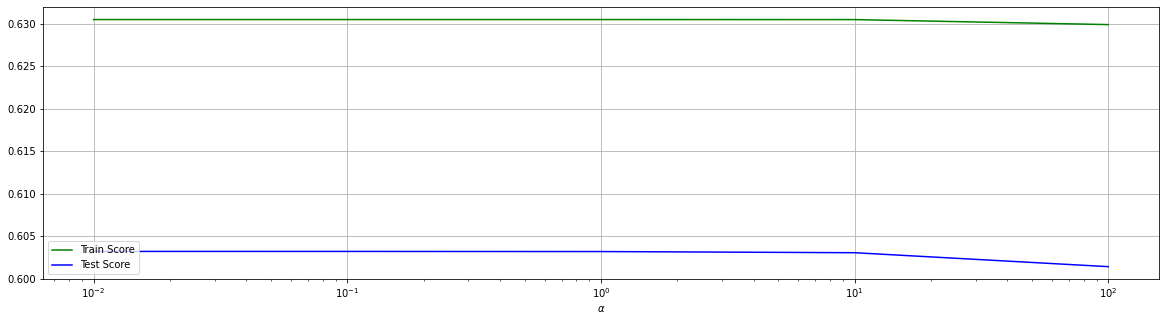

In [64]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [65]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
dict(zip(X.columns, lasso.coef_))

{'bedrooms': -233841.47729604002,
 'bathrooms': 270659.2801059393,
 'sqft_living': 951846.8340190827,
 'sqft_lot': 312166.1357483833,
 'floors': 46828.98684512541,
 'waterfront': 574559.8124833866,
 'view': 171991.92207492318,
 'condition': 94319.58159086257,
 'grade': 751334.2196222815,
 'sqft_above': 332373.84308719274,
 'sqft_basement': 237100.84303673886,
 'yr_built': -240865.1224775209,
 'yr_renovated': 46154.550176009616,
 'lat': 317133.1572508306,
 'long': -110888.45564509042,
 'sqft_living15': 229721.65696152826,
 'sqft_lot15': -342547.5996931077,
 'year': 24658.92973464247}

#### KNN Regressor

In [67]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(18):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 264575.82202032144
RMSE value for k=  2 is: 256216.71325699822
RMSE value for k=  3 is: 239961.5378442222
RMSE value for k=  4 is: 240469.5209716121
RMSE value for k=  5 is: 242418.89296807582
RMSE value for k=  6 is: 242024.98716322312
RMSE value for k=  7 is: 244022.61925760494
RMSE value for k=  8 is: 245720.28775332464
RMSE value for k=  9 is: 245917.78981208883
RMSE value for k=  10 is: 248744.03670123682
RMSE value for k=  11 is: 249527.83434558465
RMSE value for k=  12 is: 251129.54516517217
RMSE value for k=  13 is: 252203.69514444825
RMSE value for k=  14 is: 253141.05280048584
RMSE value for k=  15 is: 254480.43142651932
RMSE value for k=  16 is: 255111.49242143673
RMSE value for k=  17 is: 255374.02825417617
RMSE value for k=  18 is: 257286.90903874597


<AxesSubplot:>

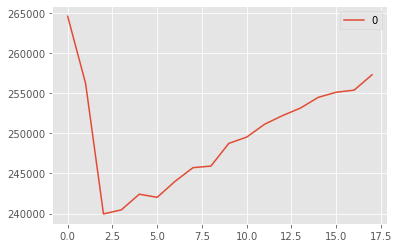

In [68]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
knn_test = KNeighborsRegressor(3)
knn_test.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_test.score(X_test, y_test)))

Train score: 0.8178
Test score: 0.6562


Text(0, 0.5, 'MSE')

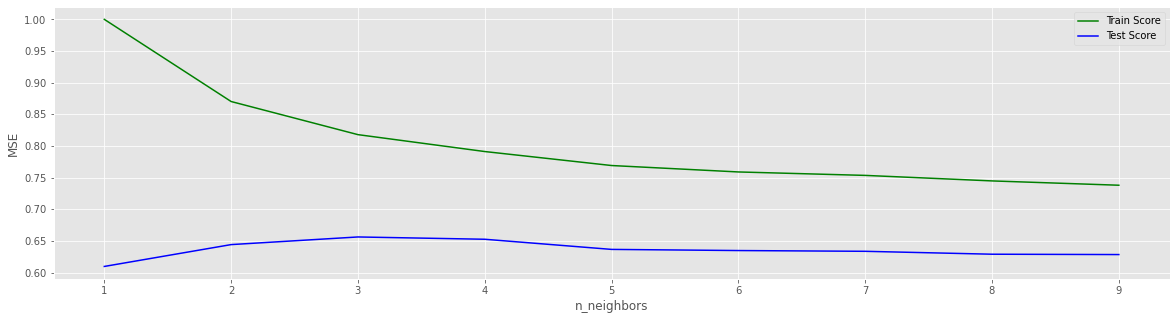

In [85]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

### Decision Tree

In [95]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = housing.drop('price',axis=1)
y = housing['price']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [96]:
print('Train score: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.5636


### Prediction
Since housing price can be changed due to many factors within a short period of time, we just use our  model to make prediction as an estiomation before actual evaluation of the property. 


In [102]:
new_house = housing.drop('price',axis=1).iloc[0]

In [103]:
new_house = scaler.transform(new_house.values.reshape(-1, 18))

In [104]:
new_house

array([[-3.84143861e-01, -1.49901528e+00,  9.48914811e-04,
        -2.21579392e-01, -8.48708009e-01, -7.93368458e-02,
        -2.90787726e-01, -5.84740776e-01, -5.23596189e-01,
        -7.77606427e-01,  2.30069067e-03, -5.40792513e-01,
        -2.17757010e-01, -3.48785228e-01, -3.13426436e-01,
        -9.95473682e-01, -2.64192910e-01, -6.89276809e-01]])

In [105]:
knn_reg.predict(new_house)

array([297540.34187034])

In [106]:
housing.iloc[0]

price            221900.000000
bedrooms              3.000000
bathrooms             1.000000
sqft_living        2080.838345
sqft_lot           5650.000000
floors                1.000000
waterfront            0.000000
view                  0.000000
condition             3.000000
grade                 7.000000
sqft_above         1180.000000
sqft_basement       291.328092
yr_built           1955.000000
yr_renovated          0.000000
lat                  47.511200
long               -122.257000
sqft_living15      1340.000000
sqft_lot15         5650.000000
year               2014.000000
Name: 0, dtype: float64